In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/adityanaik1122/AL_ML_DS/refs/heads/main/Dataset/Salary_Data.csv'
df = pd.read_csv(url)
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

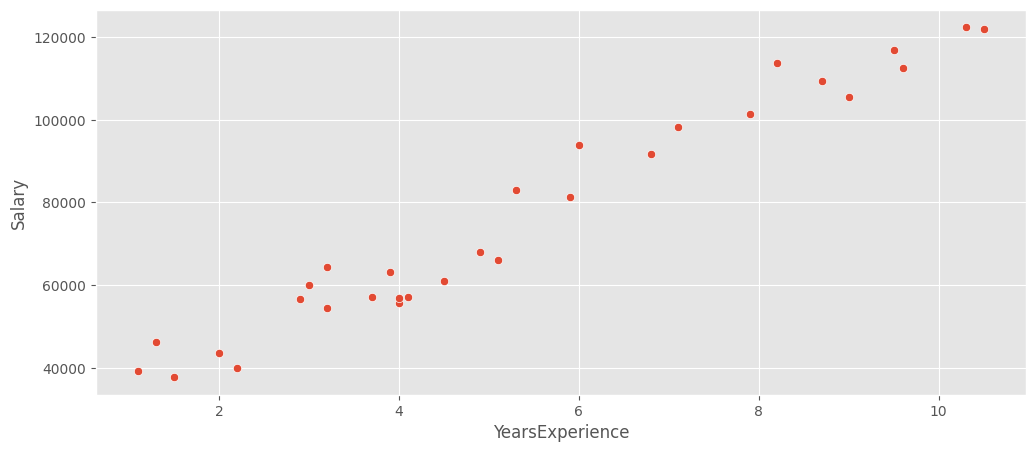

In [10]:
plt.figure(figsize = (12,5) , dpi = 100)
sns.scatterplot(x='YearsExperience',y='Salary',data=df)

* Only one independent feature
* Relationship between dependent and independent featire is linear
* Simple linear regression is suitable algorigm

In [13]:
X = df[['YearsExperience']].values
Y = df[['Salary']].values

In [14]:
print('Independent feture shape : ',X.shape)
print('Dependent feture shape : ',Y.shape)

Independent feture shape :  (30, 1)
Dependent feture shape :  (30, 1)


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state = 5)

In [21]:
print('Training data shape  : ', x_train.shape)
print('Training label shape : ', y_train.shape)
print('Testing data shape   : ', x_test.shape)
print('Testing label shape  : ', y_test.shape)

Training data shape  :  (22, 1)
Training label shape :  (22, 1)
Testing data shape   :  (8, 1)
Testing label shape  :  (8, 1)


**Training The Model**

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [27]:
regressor.predict([[10]])

array([[120420.32077908]])

In [28]:
regressor.predict([[10],[12],[32],[24]])

array([[120420.32077908],
       [139094.60224871],
       [325837.41694505],
       [251140.29106651]])

In [29]:
#Evaluation
print('Traing Set Score: ', regressor.score(x_train, y_train))
print('Testing Set Score: ', regressor.score(x_test, y_test))

Traing Set Score:  0.9560748883996936
Testing Set Score:  0.9556640405326781


**Visualizing The Model Fit**

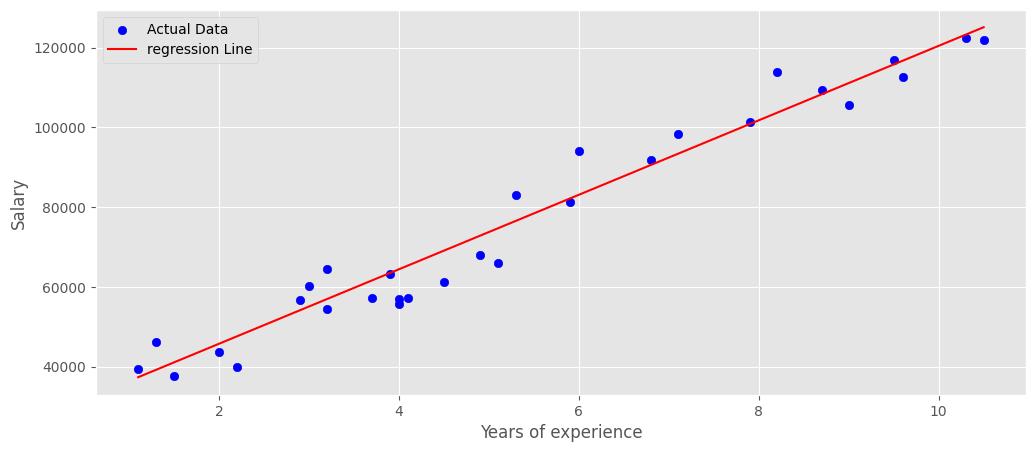

In [33]:
pred = regressor.predict(X)

plt.figure(figsize = (12,5), dpi = 100)
plt.scatter(X,Y, color = 'blue', label = 'Actual Data')
plt.plot(X,pred, color = 'red', label = 'regression Line')

plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.legend()

In [34]:
compare = pd.DataFrame({'Actual Salary' : Y.ravel(), 'Predicted Salary' : pred.ravel()})
compare

,Actual Salary,Predicted Salary
0,39343,37319.768239
1,46205,39187.196386
2,37731,41054.624533
3,43525,45723.194901
4,39891,47590.623048
5,56642,54126.621562
6,60150,55060.335635
7,54445,56927.763782
8,64445,56927.763782
9,57189,61596.334150
